# Genetic Algorithm in Practice

Now that we went through all the basic concepts of a genetic algorithm, we are ready to see how it actually works in practice. We will try to solve two problems with genetic algorithm. The first is the `N-Queen Problem` and the second is a `Dynamic Voltage-Frequency Scaling (DVFS)` problem.



<figure>
    <center> <img src="./pics/practice/practice.jpeg"  alt='missing' width="450"  ><center/>
<figure/>

## **Contents**

<a href='#nqueens'>01. Solving N-Queens Problem</a>  
 
<a href='#dvfs'>02. Dynamic Voltage-Frequency Scaling (DVFS)</a>

## <a id='nqueens'>Solving N-Queens Problem</a>

The **N-Queen problem** is a classic computer science problem that involves placing `N` chess queens on an `N×N` chessboard so that no two queens threaten each other. In other words, no two queens are allowed to be placed on the same row, column, or diagonal. 

<span style="color:#998800">This problem can be solved using **backtracking**, a recursive algorithmic technique that incrementally builds candidates to the solutions, and abandons a candidate ("backtracks") as soon as it determines that the candidate cannot possibly be completed to a valid solution.</span>

<span style="color:#009988">The expected output is in the form of a matrix that has '1's for the blocks where queens are placed and the empty spaces are represented by '0'. </span>


<figure>
    <center> <img src="./pics/practice/n-queen.png"  alt='missing' width="350"  ><center/>
<figure/>

The N-Queen problem can be solved using backtracking as follows:


>1. Start in the leftmost column.
>2. If all queens are placed, return true.
>3. Try all rows in the current column. Do the following for every row: <br>
> If the queen can be placed safely in this row, then mark this [row, column] as part of the   solution and recursively check if placing the queen here leads to a solution. <br>
> If placing the queen in [row, column] leads to a solution, then return true. <br>
> If placing the queen doesn't lead to a solution, then unmark this [row, column], backtrack, and try other rows. <br>
>4. If all rows have been tried and a valid solution is not found, return false to trigger backtracking.


Here is an implementation of the above approach in Python:


In [5]:
import time

def isSafe(board, row, col, N):
    """
    To check if it is safe to place a queen on a given cell of the chessboard.
    If any of the conditions are true, the function returns False, indicating 
    that it is not safe to place a queen on the given cell. Otherwise, the function
    returns True, indicating that it is safe to place a queen on the given cell.
    board: a 2D list that represents the chessboard
    row and col: the coordinates of the cell to be checked
    N: Number of queens to be placed on the board (the size of the chessboard).
    """
    # Checking Horizontally:
    # Check if there is already a queen in the same row to the left of the given cell.
    for i in range(col):
        if board[row][i] == 1:
            return False
    # Checking left Diagonal:
    # Check if there is already a queen in the diagonal to the upper-left of the given cell.
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    # Checking right Diagonal:
    # Check if there is already a queen in the diagonal to the lower-left of the given cell.
    for i, j in zip(range(row, N, 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    return True

def solveNQUtil(board, col, N):
    """
    A recursive function that is used to solve the N-Queen problem using backtracking.
    board: a 2D list that represents the chessboard
    col: the current column being processed  
    N: Number of queens to be placed on the board (the size of the chessboard).
    """
    # If all queens are placed on the board, return True
    if col == N:
        return True
    # For each row in the current column, check if it is safe to place 
    # a queen on that cell using the isSafe function.
    for i in range(N):
        if isSafe(board, i, col, N):
            # mark the cell as part of the solution
            board[i][col] = 1 
            # Recursively call solveNQUtil for the next column.
            if solveNQUtil(board, col + 1, N):
                # If the recursive call returns True, then a solution has been 
                # found and the function returns True.
                return True
            # If the recursive call returns False, then backtrack by 
            # unmarking the cell and trying the next row.
            board[i][col] = 0
    # If all rows have been tried and no solution has been found, 
    # return False to trigger backtracking.
    return False

def solveNQ(N, do_print = False):
    """
    To solve N-Queen problem.
    N: Number of queens to be placed on the board (the size of the chessboard).
    """
    # initialize the board with 0's 
    board = [[0 for i in range(N)] for j in range(N)]
    # couldn't find a solution
    if solveNQUtil(board, 0, N) == False:
        print("Solution does not exist")
        return False
    if (do_print):
        # print the final solution
        for i in range(N):
            for j in range(N):
                print(board[i][j], end=" ")
            print()
    return True


solveNQ(5, True)
 

1 0 0 0 0 
0 0 0 1 0 
0 1 0 0 0 
0 0 0 0 1 
0 0 1 0 0 


True

The N-Queen problem can be solved using a **genetic algorithm**. A genetic algorithm is a search heuristic that is inspired by the process of natural selection. It is used to find approximate solutions to optimization and search problems. 

<span style="color:#6588EE">In the case of the N-Queen problem, the genetic algorithm can be used to find a solution by generating a population of candidate solutions (chromosomes) and iteratively improving them through selection, crossover, and mutation operations. The fitness function for the N-Queen problem can be defined as the number of non-attacking pairs of queens on the board. The genetic algorithm can then be used to maximize this fitness function by iteratively generating new populations of chromosomes until a satisfactory solution is found.</span>

There are several advantages of using a **genetic algorithm** over **backtracking** to solve the N-Queen problem. Here are some of them:

1. **Scalability**: Backtracking is an exhaustive search algorithm that can become computationally expensive for large values of N. Genetic algorithms, on the other hand, can handle larger problem sizes more efficiently by generating populations of candidate solutions and iteratively improving them through selection, crossover, and mutation operations.

2. **Multiple Solutions**: Backtracking is designed to find a single solution to a problem. Genetic algorithms, however, can be used to find multiple solutions to the N-Queen problem by generating multiple populations of candidate solutions and selecting the best ones.

3. **Robustness**: Backtracking can be sensitive to the order in which the search space is explored. Genetic algorithms, on the other hand, are more robust to changes in the search space and can handle noisy or incomplete data more effectively.

4. **Parallelization**: Genetic algorithms can be easily parallelized to take advantage of multi-core processors and distributed computing environments. Backtracking, on the other hand, is inherently sequential and cannot be parallelized as easily.

<span style="color:#EE7599">However, it's worth noting that the performance of genetic algorithms can be sensitive to the choice of parameters such as population size, mutation rate, and crossover rate. In practice, the choice of algorithm depends on the specific problem and the available computational resources.</span>

The following is an example of a genetic algorithm implementation for solving the N-Queen problem in Python:


In [6]:
import numpy as np
import random

def fitness(chromosome):
    """
    To calculate the fitness of an individual (potential solution).
    chromosome: individual (potential solution)
    """
    chrom_length = len(chromosome)
    # Initialize diagonal_collisions, reverse_diagonal_collisions to zero.
    diagonal_collisions = 0
    reverse_diagonal_collisions = 0
    # Calculate the number of horizontal collisions in a potential solution
    # example: [0, 1, 2, 1] has one horizontal collision.
    horizontal_collisions = len(chromosome) - len(set(chromosome))
    # For each pair of queens on the board, check if they are attacking each 
    # other diagonally.
    for i in range(chrom_length):
        for j in range(chrom_length):
            if i != j:
                if abs(i - j) == abs(chromosome[i] - chromosome[j]):
                    diagonal_collisions += 1
                if abs(i - j) == abs(chromosome[j] - chromosome[i]):
                    reverse_diagonal_collisions += 1
    return 50 + chrom_length - (horizontal_collisions + diagonal_collisions + reverse_diagonal_collisions)

def generate_population(size, chrom_length):
    """
    To generate a population of individuals (potential solutions).
    size: size of the population
    chrom_length: length of an individual (number of queens to be placed)
    """
    population = []
    for _ in range(size):
        chromosome = [random.randint(0, chrom_length - 1) for _ in range(chrom_length)]
        population.append(chromosome)
    return population

def selection(population, fitness):
    """
    Use roulette wheel selection to select two individuals from the population for crossover.
    population: the population we're selecting from
    fitness: the corresponding fitness scores of the population individuals
    """
    return random.choices(population, weights=fitness, k=2)

def crossover(parents):
    """
    Using one-point crossover to produce two children from the selected parents.
    parents: the two parents selected for crossover
    """
    chrom_length = len(parents[0])
    crossover_point = random.randint(1, chrom_length - 1)
    child1 = parents[0][:crossover_point] + parents[1][crossover_point:]
    child2 = parents[1][:crossover_point] + parents[0][crossover_point:]
    return child1, child2

def mutation(chromosome, probability):
    """
    Using random resetting mutation to introduce random changes to the chromosome.
    chromosome: the individual going under mutation
    probability: the probability of mutation
    """
    chrom_length = len(chromosome)
    for i in range(chrom_length):
        if random.random() < probability:
            chromosome[i] = random.randint(0, chrom_length - 1)
    return chromosome

def genetic_algorithm(n, size=1000, generations=200, mutation_probability=0.3):
    """
    To perform genetic algorithm and find valid solutions.
    n: number of queens (the length of the chromosome)
    size: size of the population
    generations: number of generations we're running the algorithm
    mutation_probability: the probability of mutation
    """   
    # initialize the population
    population = generate_population(size, n)
    for _ in range(generations):
        # calculating the fitness of population individuals for the generation
        fitness_scores = [fitness(chromosome) for chromosome in population]
        # if the fitness of a solution is equal to chrom_length, it means that
        # it doesn't have any collisions. So, return the valid solution.
        if max(fitness_scores) == n + 50:
            return population[fitness_scores.index(max(fitness_scores))]
        # Perform selections, recombinations, and mutations to create the  
        # population of the next generation.
        parents = [selection(population, fitness_scores) for _ in range(size // 2)]
        children = [crossover(parents[i]) for i in range(size // 2)]
        population = [mutation(children[i][0], mutation_probability) for i in range(size // 2)] + [mutation(children[i][1], mutation_probability) for i in range(size // 2)]
    return None

def print_board(chrom):
    """
    To print the final solution on a board.
    chrom: the valid solution (individual)
    """  
    matrix = np.zeros((len(chrom), len(chrom)), dtype=int)
    for i, j in enumerate(chrom):
        matrix[j, i] = 1
    result = '\n'.join([' '.join([str(cell) for cell in row]) for row in matrix])
    print(result)
    return None


print_board(genetic_algorithm(5))

0 1 0 0 0
0 0 0 1 0
1 0 0 0 0
0 0 1 0 0
0 0 0 0 1


## The execution time of Backtracking vs GA

<span style="color:#EE8877">The **backtracking algorithm** is a deterministic algorithm that can solve the N-Queen problem exactly in a reasonable amount of time for small values of N. However, as the size of the chessboard increases, the number of possible solutions grows exponentially, which can make it computationally expensive to find a valid solution.</span>

<span style="color:#7788EE">The **genetic algorithm** is a stochastic algorithm that uses a population of candidate solutions to iteratively improve the fitness of the population. While the genetic algorithm can handle larger problem sizes more efficiently than backtracking, it is not guaranteed to find an exact solution to the problem. Instead, it finds an approximate solution that is close to the optimal solution.</span>

The performance of the genetic algorithm depends on several factors, including the size of the population, the number of generations, the mutation rate, and the crossover rate. In general, increasing the size of the population and the number of generations can improve the quality of the solution, but it can also increase the computational cost of the algorithm. Similarly, increasing the mutation rate and the crossover rate can increase the diversity of the population, but it can also reduce the quality of the solution.


In [7]:
num_executions = 500
total_execution_time = 0

for i in range(num_executions):
    start_time = time.time()
    solveNQ(4)
    end_time = time.time()
    execution_time = end_time - start_time
    total_execution_time += execution_time

average_execution_time = total_execution_time / num_executions

print(f"Average execution time for backtracking algorithm: {average_execution_time:.4f} seconds")

#===================================================================================
#===================================================================================

total_execution_time = 0

for i in range(num_executions):
    start_time = time.time()
    genetic_algorithm(4)
    end_time = time.time()
    execution_time = end_time - start_time
    total_execution_time += execution_time

average_execution_time = total_execution_time / num_executions

print(f"Average execution time for genetic algorithm: {average_execution_time:.4f} seconds")

Average execution time for backtracking algorithm: 0.0000 seconds
Average execution time for genetic algorithm: 0.0087 seconds


## <a id='dvfs'>Dynamic Voltage-Frequency Scaling (DVFS)</a>

**Dynamic voltage frequency scaling (DVFS)** is a technique used to reduce power consumption in electronic devices by dynamically adjusting the voltage and frequency of the device based on its performance requirements. DVFS techniques provide ways to reduce power consumption of chips on the fly by scaling down the voltage (and frequency) based on the targeted performance requirements of the application. Lowering the voltage has a squared effect on active power consumption, making it an effective way to reduce power consumption. DVFS optimizes both the frequency and the voltage, making it highly effective on both dynamic and static power.

<span style="color:#66FFCB">DVFS techniques are important because they make it possible to extend the battery life of portable devices and reduce the power consumption of data centers. DVFS can improve dynamic power by 40-70% and provide 2X to 3X improvement in leakage.</span>


<figure>
    <center> <img src="./pics/practice/dvfs.png"  alt='missing' height="400" width="550" ><center/>
<figure/>

On the other hand, there is a technique called **Dynamic Power Management (DPM)** that selectively turns off certain parts of the device when they are not needed. This technique is used to reduce the power consumption of the device when it is idle or when it is performing tasks that do not require the full capacity of the device. DPM can be used in conjunction with DVFS to further reduce power consumption.

In summary, DVFS is a technique that dynamically adjusts the voltage and frequency of the device based on its performance requirements, while DPM is a technique that selectively turns off certain parts of the device when they are not needed. Both techniques are used to reduce power consumption in electronic devices, and they can be used together to further reduce power consumption. In our example, we'll focus on DVFS.


## Optimizing Energy Consumption with DVFS

Imagine that we have 10 tasks. <br>
The maximum time it takes for each task to be completed is 10, 12, 7, 14, 15, 20, 10, 10, 16, and 8 respectively. <br>
The average times for the tasks to be completed is 8, 9, 6, 10, 10, 14, 6, 8, 10, and 5 respectively. <br>
All the tasks should be completed befor the time 300. <br>
The dynamic power of the system is twice as the subthreshold static power and bulk static power. <br>
For voltage and frequency scaling factor, we only consider discrete values between 0.4 and 1 (e.g., 0.4, 0.5, ..., 0.9, 1.0). <br>


<figure>
    <center> <img src="./pics/practice/task.png"  alt='missing' height="350" width="700" ><center/>
<figure/>

Now, we want to investigate all of the possible values for the voltage and frequency and find the optimum point. We consider two approaches for solving this problem: Using **brute force** and using a **genetic algorithm** approach (though, for this particular problem, it can be formulized as follows and the optimum values calculated using MATLAB).

<figure>
    <center> <img src="./pics/practice/optimization_formulas.png"  alt='missing' height="650" width="700" ><center/>
<figure/>

In the second section, we write a computer program that checks all the 
possible voltage and frequency values and picks the one that minimizes 
the energy function and returns it. Due to the high order of this 
program (10𝑛
), which is the result of 10 nested loops, the program can 
take a very long time to execute, which makes it infeasible. But to show 
that the program works, we execute the program for 𝑠𝑡𝑒𝑝 = 0.2 and 
return the results. This program is not executed for 0.1, 0.05, or 0.01 
cause of a long time it takes to execute (it can go from hours to days and more)! Instead, we take a different approach to solving this 
problem.
For finding sufficient results for DVFS coefficients that minimize the 
energy function, we use a genetic algorithm framework. In this method, 
we have an initial population which is a set of potential answers for the 
optimization problem. These answers are called chromosomes, where 
each chromosome has its id, genes, and fitness. The way we operate in 
this problem is that we take a group of the best individuals from this 
population (the ones that have better fitness), and then we do 
crossover and mutation on this selected group. Then we collect the 
selected group and the newly generated individuals in a list. We select 
the best ones from this list and we replace the individuals with the 
worst fitness in the initial population with these chromosomes that 
have good fitness. We do this for several iterations. To ensure a good 
answer, we repeat the process until a good value for energy is 
achieved. This modification increases the execution time and is 
optional. For fitness of a chromosome, we have:

<figure>
    <center> <img src="./pics/practice/fitness.png"  alt='missing' height="150" width="500" ><center/>
<figure/>

which is the inversion of the energy for that answer (energy is a cost in 
our problem and the less it is the better).


### **OPTIMIZATION USING BRUTE FORCE**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy


#========================================================================================
#                        OPTIMIZATION USING BRUTE FORCE
#========================================================================================
def brute_force(step):  
    """
    A function that searches all possible combinations (Brute Force) and finds
    a collection of values for DVFS coefficients that minimizes the energy function
    due to the constraints (optimization depends on the step).
    Returns optimum coefficients and corresponding energy
    """
    #for the length of for loop
    length = (int)(1/step)
    task_numbers = 10 
    x = [step]*task_numbers #list contining different set of coefficients
    optimum = [step]*task_numbers # A list that saves the best results for minimizing the energy function
    energy = calculate_energy(x) # energy consumption with coefficients x
    value = 0.0 #for storing energy values for different coefficients 

    for a in range(length-1):
        for b in range(length-1):
            for c in range(length-1):
                for d in range(length-1):
                    for e in range(length-1):
                        for f in range(length-1):
                            for g in range(length-1):
                                for h in range(length-1):
                                    for i in range(length-1):
                                        for j in range(length-1):
                                            value = calculate_energy(x)
                                            if (value < energy):
                                                energy = value #update value of energy
                                                optimum = x    #update optimum coefficients
                                            x[9] += step
                                        #End of loop1
                                        x[8] += step
                                        x[9] = step
                                    #End of loop2
                                    x[7] += step
                                    x[8] = step
                                    x[9] = step
                                #End of loop3
                                x[6] += step
                                x[7] = step
                                x[8] = step
                                x[9] = step
                            #End of loop4
                            x[5] += step
                            x[6] = step
                            x[7] = step
                            x[8] = step
                            x[9] = step
                        #End of loop5
                        x[4] += step
                        x[5] = step
                        x[6] = step
                        x[7] = step
                        x[8] = step
                        x[9] = step
                    #End of loop6
                    x[3] += step
                    x[4] = step
                    x[5] = step
                    x[6] = step
                    x[7] = step
                    x[8] = step
                    x[9] = step
                #End of loop7
                x[2] += step
                x[3] = step
                x[4] = step
                x[5] = step
                x[6] = step
                x[7] = step
                x[8] = step
                x[9] = step
            #End of loop8
            x[1] += step
            x[2] = step
            x[3] = step
            x[4] = step
            x[5] = step
            x[6] = step
            x[7] = step
            x[8] = step
            x[9] = step
        #End of loop9
        x[0] += step
        x[1] = step
        x[2] = step
        x[3] = step
        x[4] = step
        x[5] = step
        x[6] = step
        x[7] = step
        x[8] = step
        x[9] = step
    #End of loop10 

    return optimum, energy 

def conditions(x):  
    """
    This function will check whether the constraints that apply to 
    our optimization are met or not.
    """
    if ( (10/x[0]) > 66.0 ):
        return False
    elif ( (10/x[0] + 12/x[1]) > 88.0 ):
        return False
    elif ( (10/x[0] + 12/x[1] + 7/x[2]) > 107.0 ):
        return False
    elif ( (10/x[0] + 12/x[1] + 7/x[2] + 14/x[3]) > 128.0 ):
        return False
    elif ( (10/x[0] + 12/x[1] + 7/x[2] + 14/x[3] + 15/x[4]) > 157.0 ):
        return False
    elif ( (10/x[0] + 12/x[1] + 7/x[2] + 14/x[3] + 15/x[4] + 20/x[5]) > 192.0 ):
        return False
    elif ( (10/x[0] + 12/x[1] + 7/x[2] + 14/x[3] + 15/x[4] + 20/x[5] + 10/x[6]) > 222.0 ):
        return False
    elif ( (10/x[0] + 12/x[1] + 7/x[2] + 14/x[3] + 15/x[4] + 20/x[5] + 10/x[6] + 10/x[7]) > 242.0 ):
        return False
    elif ( (10/x[0] + 12/x[1] + 7/x[2] + 14/x[3] + 15/x[4] + 20/x[5] + 10/x[6] + 10/x[7] + 16/x[8]) > 268.0 ): 
        return False
    elif ( (10/x[0] + 12/x[1] + 7/x[2] + 14/x[3] + 15/x[4] + 20/x[5] + 10/x[6] + 10/x[7] + 16/x[8] + 8/x[9]) > 292.0 ): 
        return False

    return True 



def calculate_energy(x):  
    """
    This function takes the DVFS coefficients (as a list named x),
    and will calculate the energy consumption for this sequence of
    DVFS coefficients that are applied to the task sequence. 
    """  
    # Defining a positive infinite integer
    positive_infinity = float('inf')
    energy = positive_infinity
    value = 0.0
    #backslash at the end of the line means the instruction continues to the next line 
    # (for easier readability)
    value = 8*(x[0])**2 + 9*(x[1])**2 + 6*(x[2])**2 + 10*(x[3])**2 + 10*(x[4])**2  \
    + 14*(x[5])**2 + 6*(x[6])**2 + 8*(x[7])**2 + 10*(x[8])**2 + 5*(x[9])**2
    if (conditions(x)):
        #if True we conclude that the result is valid (otherwise invalid)
        energy = value

    return energy



### **OPTIMIZATION BY GENETIC ALGORITHM**

In [9]:

#========================================================================================
#                        OPTIMIZATION BY GENETIC ALGORITHM
#========================================================================================  
class Chromosome():
    """
    Description of class `Chromosome`:
    This class represents a simple chromosome. In the method describe, a simple description
    of the chromosome is provided, when it is called. 
    """
    def __init__(self, genes, id_=None, fitness=-1):
        self.id_ = id_
        self.genes = genes
        self.fitness = fitness       
       
    def describe(self): 
        """
        Prints the ID, fitness, and genes
        """
        print(f"ID=#{self.id_}, Fitness={self.fitness}, \nGenes=\n{self.genes}")
 
    def get_chrom_length(self): 
        """
        Returns the length of `self.genes`
        """
        return len(self.genes)
    

# a floating-point chromosome with genes between 0 and 1
def floating_point_chrome_generator(n):
    """
    Produces chromosomes with floating-point values for each gene. (floating-point alleles)
    n: The length of the chromosome to be produced 
    """  
    return  np.random.uniform(low=0, high=1, size=n).tolist()
     
def fitness_function(chrom): #TODO needs to be more generalize and useful
    """
    This function, takes a chromosome and returns a value as its fitness.
    chrom: The chromosome which its fitness is calculated and returned.
    """  
    return (1/calculate_energy(chrom))
 
def pop_sort(pop):
    """
    This function sorts the population based on their fitnesses, using selection sort.
    pop: The population that are sorted based on their fitnesses.
    """  
    for i in range(len(pop)): 
        min_index = i 
        for j in range(i+1, len(pop)): 
            if pop[min_index].fitness > pop[j].fitness: 
                min_index = j        
        pop[i], pop[min_index] = pop[min_index], pop[i]    
    return pop


def find_best_chromosome(pop):
    """
    This function searches a list of chromosomes and returns the chromosome with the best fitness.
    pop: The given list of chromosomes 
    """  
    best_chrom = Chromosome(genes= np.array([0.0]*10), id_=200, fitness = 0.0)
    for i in range(len(pop)): 
        if(pop[i].fitness > best_chrom.fitness):
            best_chrom = pop[i]
      
    return best_chrom


def pop_initialization(pop_size, chrom_size): 
    """
    This function creates a population with the size pop_size, with chrom_size for the size of the chromosomes.
    pop_size: Size of the population
    chrom_size: Size of each chromosome in the population
    """  
    pop = []
    for i in range(pop_size):
        chrom = floating_point_chrome_generator(chrom_size)
        chrom_fitness = fitness_function(chrom)
        pop.append(Chromosome(genes= np.array(chrom),id_=i,fitness = chrom_fitness))#fitness fixed 

    return pop

def truncation_selection(selection_size, pop):
    """
    In Truncation Selection, Only the fittest members of the population will be selected
    and these individuals will be duplicated to maintain the population.
    This function takes a population, and returns the fittest ones inside.
    selection_size: Number of individuals to be selected within the population.
    pop_size: Size of the population
    pop: The population which we want to select a number of individuals among them. 
    """  
    pop_size = len(pop) #Size of the population
    sorted_pop = pop_sort(pop)
    select = []
    if selection_size > pop_size: #assuring that the selection size is less than the size of the population
        selection_size = pop_size
    d = 0
    for i in range(pop_size-1,-1,-1): #backward loop
        if (d < selection_size):
            select.append(sorted_pop[i])
            d += 1
        else:
            break
    return select


"Heuristic crossover(HC) or Intermidiate crossover(IC)"
def heuristic_crossover(parent_one, parent_two, pc):
    """
    This function takes two parents, and performs Heuristic crossover on them. 
    parent_one: First parent
    parent_two: Second parent
    pc: The probability of crossover
    """  
    
    # print("\nParents")
    # print("=================================================")
    # Chromosome.describe(parent_one)
    # Chromosome.describe(parent_two)
    
    chrom_length = Chromosome.get_chrom_length(parent_one)
    random_integer = np.random.randint(5, 98)
    child_one = Chromosome(genes= np.array([0.0]*chrom_length),id_=random_integer,fitness = 0.0)  # child
    a = np.random.uniform(low=0, high=0.4)
    if np.random.rand() < pc:  # if pc is greater than random number
        for i in range(chrom_length):
            child_one.genes[i] = round(parent_one.genes[i] + a*np.abs(parent_two.genes[i] - parent_one.genes[i]), 5)
            if (child_one.genes[i] > 0.8): child_one.genes[i] = np.random.uniform(low=0.2, high=0.75)

    else:  # if pc is less than random number then don't make any change
        child_one = deepcopy(parent_one)

    #calculating the fitness
    child_one.fitness = fitness_function(child_one.genes)
      
    return child_one

"Creep mutation"
def creep_mutation(parent_one, pm):
    """
    This function takes one chromosome, and performs Creep mutation on it. 
    parent_one: The parent
    pm: The probability of mutation
    """ 
  
    # print("\nParent")
    # print("=================================================")
    # Chromosome.describe(parent_one)
    chrom_length = Chromosome.get_chrom_length(parent_one)
    random_integer = np.random.randint(5, 98)
    child_one = Chromosome(genes= np.array([0.0]*chrom_length),id_=random_integer,fitness = 0.0)  # child

    if np.random.rand() < pm:  # if pm is greater than random number
        point = np.random.randint(0, chrom_length)
        child_one.genes = parent_one.genes 
        child_one.genes[point] = round(np.random.uniform(low=0.2, high=0.85), 5)

    else:  # if pm is less than random number then don't make any change
        child_one = deepcopy(parent_one)
    
    #calculating the fitness
    child_one.fitness = fitness_function(child_one.genes)

    return child_one

def generation_production(pop_size, iterations):
    """
    This function produces generation after generation, 
    to get the DVFS coefficients that sufficiently minimize the energy. 
    pop_size: The size of initial population given for further optimization.
    iterations: The number of iterations that a generation is updated with new offsprings.
    """ 
    pop = pop_initialization(pop_size, 10) #initializing the population
    offsprings = [] # a list containing offsprings produced in crossover and mutation
    best_chroms = [] # a list for saving the best chromosome in each generation
    best_chrom = Chromosome(genes= np.array([0.0]*10), id_=200, fitness = 0.0)
    selection_size = 15
    for i in range(iterations):
        selection = truncation_selection(selection_size, pop) #choose the best 15 from the population
        for m in range(selection_size):
            offsprings.append(selection[m]) #Add selected chromosomes to the list offsprings
        for j in range(10):
            a =  np.random.randint(0, selection_size-1) #choose two random integers in selection_size
            b =  np.random.randint(0, selection_size-1)
            cross = heuristic_crossover(selection[a], selection[b], 0.8) #perform crossover on the chosen chromosomes
            offsprings.append(cross)

        for k in range(5):
            c = np.random.randint(0, selection_size-1) #choose a random integer in selection_size
            mutation = creep_mutation(selection[c], 0.7) #perform mutation on the chosen chromosome
            offsprings.append(mutation)

        #selecting the best of offsprings
        best_offsprings = truncation_selection(20, offsprings) #choose the best 20 from the offsprings

        #replacing the worst members of the population with the best offsprings
        sorted_pop = pop_sort(pop) #sort the population based on their fitnesses (in ascending order)
        for t in range(len(best_offsprings)):
            sorted_pop[t] = best_offsprings[t] #replace the bad chromosomes with good ones

        pop = sorted_pop #update the population for the next iteration

        best_chroms.append(find_best_chromosome(pop)) #saving the best answer in each generation

        # print("\n================ population chroms in generation",i,"=====================\n")
        # for i in range(len(pop)): #printing the selection
        #     Chromosome.describe(pop[i])

    #find the best chromosome from the list of best chromosomes
    best_chrom = find_best_chromosome(best_chroms) 

    return best_chrom




### **SHOWING THE RESULTS**

In [10]:

#========================================================================================
#                                    SHOWING THE RESULTS
#========================================================================================

# Showing the results that are achieved by genetic algorithm approach
best_chrom = generation_production(50, 10) #10 iterations
while (calculate_energy(best_chrom.genes) > 16.4):
    best_chrom = generation_production(50, 15) #15 iterations
print("==================================================")
print("GENETIC ALGORITHM SOLUTION")
print("==================================================")
# print("\n================   BEST CHROMOSOME ====================\n")
# Chromosome.describe(best_chrom)
genetic_energy = calculate_energy(best_chrom.genes)
print("Values for DVFS coefficients by using Genetic Algorithm are:\n", best_chrom.genes)
print("The best energy achieved by genetic algorithm approach is:", genetic_energy)



#Showing the results that are achieved by brute force approach
brute_force_vector, brute_force_energy = brute_force(0.2)
print("==================================================")
print("BRUTE FORCE SOLUTION")
print("==================================================")
print("Values for DVFS coefficients by using Brute Force are:\n", brute_force_vector)
print("The best energy achieved by brute_force approach is:", brute_force_energy)


#Showing the results that are achieved by maximum voltage & frequency
maximum_frequency_vector = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
maximum_frequency_energy = calculate_energy(maximum_frequency_vector)
print("==================================================")
print("MAXIMUM FREQUENCY SOLUTION")
print("==================================================")
print("Values for DVFS coefficients for using Maximum Voltage & Frequency are:\n", maximum_frequency_vector)
print("The best energy achieved by Maximum Frequency approach is:", maximum_frequency_energy)


#Showing the results that are achieved by minimum voltage & frequency possible (THANKS TO MATLAB)
minimum_frequency_vector = [(5/33), (6/11), (7/19), (2/3), (15/29), (4/7), (1/3), (1/2), (8/13), (1/3)]
minimum_frequency_energy = calculate_energy(minimum_frequency_vector)
print("==================================================")
print("MINIMUM FREQUENCY SOLUTION")
print("==================================================")
print("Values for DVFS coefficients for using Minimum Voltage & Frequency are:\n", minimum_frequency_vector)
print("The best energy achieved by Minimum Frequency approach is:", minimum_frequency_energy)



GENETIC ALGORITHM SOLUTION
Values for DVFS coefficients by using Genetic Algorithm are:
 [0.35742 0.38223 0.40259 0.39274 0.5452  0.47431 0.47302 0.42833 0.40506
 0.41414]
The best energy achieved by genetic algorithm approach is: 16.282335764899997
BRUTE FORCE SOLUTION
Values for DVFS coefficients by using Brute Force are:
 [1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
The best energy achieved by brute_force approach is: 16.76
MAXIMUM FREQUENCY SOLUTION
Values for DVFS coefficients for using Maximum Voltage & Frequency are:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
The best energy achieved by Maximum Frequency approach is: 86.0
MINIMUM FREQUENCY SOLUTION
Values for DVFS coefficients for using Minimum Voltage & Frequency are:
 [0.15151515151515152, 0.5454545454545454, 0.3684210526315789, 0.6666666666666666, 0.5172413793103449, 0.5714285714285714, 0.3333333333333333, 0.5, 0.6153846153846154, 0.3333333333333333]
The best energy achieved by Minimum Frequency approach is: 22

## Comparing the results

In the following, we compare the rsults achieved by brute force approach, genetic algorithm, using maximum voltage and frequency, and using minimum voltage and frequency to see which was more successful in achieving a better (less) energy consumption.

The tasks have maximum voltage and frequency when 𝑥 = 1 for all the 
tasks. Therefore, in the energy equation, we put 𝑥 = 1 for all $𝑥_𝑖$.

The tasks have minimum voltage and frequency when for all of the 
constraints, we replace the inequality with equality and solve the 
system of equations. The reason is that we need to have $𝑊_𝑖$/$𝑋_𝑖$ = $𝑑_𝑖$ to 
have the minimum possible frequency to execute the tasks, where $𝑊_𝑖$ is the worst-case execution time for the task 𝑖, $𝑋_𝑖$ is the DVFS  coefficient for the task 𝑖, and $𝑑_𝑖$ is the absolute deadline for the task 𝑖.

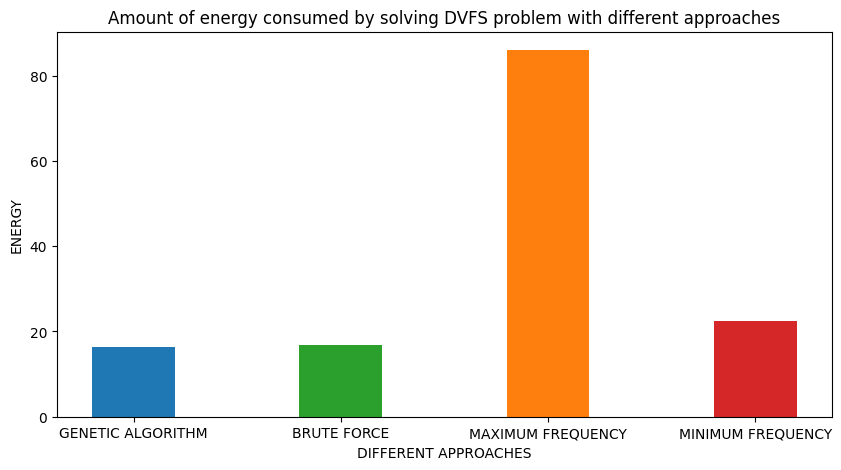

In [11]:
#========================================================================================
#                                    PLOTTING THE ENERGY RESULTS
#========================================================================================
# creating the dataset
data = {'GENETIC ALGORITHM':genetic_energy, 'BRUTE FORCE':brute_force_energy,
        'MAXIMUM FREQUENCY':maximum_frequency_energy, 'MINIMUM FREQUENCY':minimum_frequency_energy}
solutions = list(data.keys())
energies = list(data.values())

# creating the bar plot
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
# plt.bar(solutions, energies, color ='maroon', width = 0.4)        
plt.bar(solutions[0], energies[0], color = 'tab:blue', width = 0.4)
plt.bar(solutions[1], energies[1], color = 'tab:green', width = 0.4)
plt.bar(solutions[2], energies[2], color = 'tab:orange', width = 0.4)
plt.bar(solutions[3], energies[3], color = 'tab:red', width = 0.4)


plt.xlabel("DIFFERENT APPROACHES")
plt.ylabel("ENERGY")
plt.title("Amount of energy consumed by solving DVFS problem with different approaches")
plt.show()

The brute force algorithm is a guarantee 
to find the best results, but as we said earlier, its execution is too 
expensive and we could only execute it for 𝑠𝑡𝑒𝑝 = 0.2. On the other 
hand, genetic programming as well as other similar frameworks can be 
a good option for solving problems of this kind giving sufficient results. 
When we use maximum frequency for executing all the tasks, the 
energy dissipation is the worst, as neither static slacks nor pseudo 
slacks are used to minimize energy or power. In the end, we have the 
minimum-frequency execution, which is much better than maximum 
frequency execution but still gives worse results comparing to other 
methods we used to minimize the energy. This issue indicates that by 
using all of the slack we have to execute a task and minimizing the 
frequency as much as possible, we can't reach optimum results. The 
main reason for this is the static power and the bulk power which we 
should consider as well when determining the frequency of execution 
for each task. For instance, 𝑃_𝑏𝑢𝑙𝑘 (bulk static power) will go higher as we lower the task 
execution speed and at some point, the advantage that we gain by 
lowering the dynamic power does not worth it, due to the very high bulk 
power that counters it.


<span style="color:#6677FF">The result for the genetic algorithm differs in different executions. We 
can enforce the genetic program to give a result better than 16.0. In 
one of the executions, we observer results as good as 15.33 which is 
very close to the optimum. </span>



## References 

(1) Salehi, M. (2023). Embedded System Design (Thirteenth Session) [PowerPoint slides]. Google Drive. https://drive.google.com/file/d/1m_cQ_-jWQgFRq6_ugnonOmC5NiazF2Gr/view?usp=sharing

(2) Bing, M. (2023). Dynamic Voltage-Frequency Scaling [Graphic art]. Image Creator from Microsoft Designer.

(3) GeeksforGeeks. (n.d.). N Queen Problem - Backtracking [Webpage]. GeeksforGeeks. https://www.geeksforgeeks.org/n-queen-problem-backtracking-3/

(4) History-computer.com. (n.d.). Understanding the N-Queen Problem, With Examples [Webpage]. https://history-computer.com/understanding-n-queens-problem-with-examples/

(5) Gao, Y., & Zhang, X. (2021). The n-queens problem [Preprint]. arXiv.org. https://arxiv.org/abs/2109.08083

(6) javatpoint. (n.d.). N Queens Problems [Webpage]. https://www.javatpoint.com/n-queens-problems

(7) LeetCode. (n.d.). N-Queens [Webpage]. LeetCode. https://leetcode.com/problems/n-queens/

(8) Chavan, J. (n.d.). N-queen.py [Python Script]. GitHub. https://github.com/jayesh-chavan-au7/Data-Structures-and-Algorithmic/tree/157419e8a38327a7495a2e278374d38142b847e5/Recursion-and-Backtracking%2FN-queen.py

(9) Dengla, A. (n.d.). nqueen.py [Python Script]. GitHub. https://github.com/ankurdengla/Sem_4_AI_Codes/tree/96416b122679bce06535f8ba962758a0fdd819b8/Base%20Codes%20AI%2FAI%20Lab%2Fnqueen.py

(10) Horno, J. (n.d.). all_queens.py [Python Script]. GitHub. https://github.com/horno/queens/tree/5b3c26064700b9304ec40680d079b31417c7f07f/all_queens.py

(11) Bing, M. (2023). Two girls looking at a DNA doing dumbbells [Graphic art]. Image Creator from Microsoft Designer.

(12) Editorial Team. (2021, March 18). Solving the 5-Queens Problem Using Genetic Algorithm [Webpage]. Towards AI. https://towardsai.net/p/computer-science/solving-the-5-queens-problem-using-genetic-algorithm

(13) waqqasiq. (n.d.). N-Queen problem using Genetic Algorithm [Webpage]. GitHub. https://github.com/waqqasiq/n-queen-problem-using-genetic-algorithm

(14) Gao, Y., & Zhang, X. (2018). An Adaptive Genetic Algorithm for Solving N- Queens Problem [Preprint]. arXiv.org. https://arxiv.org/pdf/1802.02006.pdf

(15) Gao, Y., & Zhang, X. (2018). An Adaptive Genetic Algorithm for Solving N- Queens Problem [Preprint]. arXiv.org. https://arxiv.org/pdf/1802.02006.pdf

(16) GeeksforGeeks. (n.d.). N Queen Problem - Backtracking [Webpage]. GeeksforGeeks. https://www.geeksforgeeks.org/n-queen-problem-backtracking-3/

(17) Saini, R., & Singh, S. (2010). Using genetic algorithm for solving N-Queens problem [Conference Paper]. IEEE Xplore. https://ieeexplore.ieee.org/document/5561604/

(18) Control.com. (n.d.). Genetic Algorithm Applications and Limitations - Technical Articles [Webpage]. https://control.com/technical-articles/applications-and-limitations-of-genetic-programming/

(19) Kaur, A., & Singh, S. (2023). Genetic algorithms: theory, genetic operators, solutions, and ... [Journal Article]. Journal of Ambient Intelligence and Humanized Computing, 14(1), 1-20. https://link.springer.com/article/10.1007/s12065-023-00822-6

(20) Singh, S., & Kaur, A. (2021). A review on genetic algorithm: past, present, and future [Journal Article]. Multimedia Tools and Applications, 80(1), 1-29. https://link.springer.com/article/10.1007/s11042-020-10139-6

(21) Wikipedia contributors. (2022, December 28). Genetic algorithm. In Wikipedia. https://en.wikipedia.org/wiki/Genetic_algorithm.

(22) Semiconductor Engineering. (n.d.). Dynamic Voltage and Frequency Scaling (DVFS) [Webpage]. Semiconductor Engineering. https://semiengineering.com/knowledge_centers/low-power/techniques/dynamic-voltage-and-frequency-scaling/

(23) Cadence. (n.d.). Dynamic Voltage Scaling [Webpage]. Advanced PCB Design Blog. https://resources.pcb.cadence.com/blog/2023-dynamic-voltage-scaling

(24) Texas Instruments. (2015). Adaptive (Dynamic) Voltage (Frequency) Scaling Motivation and ... [Application Note]. https://www.ti.com/lit/an/slva646/slva646.pdf

(25) Semiconductor Engineering. (n.d.). Dynamic Voltage and Frequency Scaling (DVFS) [Webpage]. Semiconductor Engineering. https://semiengineering.com/knowledge_centers/low-power/techniques/dynamic-voltage-and-frequency-scaling/

(26) Kim, J., & Kim, J. (2012). Optimal DPM and DVFS for Frame-Based Real-Time Systems [Conference Paper]. ACM Digital Library. https://dl.acm.org/doi/pdf/10.1145/2400682.2400700

(27) Zhang, Y., & Liu, Y. (2012). Effectiveness Analysis of DVFS and DPM in Mobile Devices [Journal Article]. Journal of Computer Science and Technology, 27(1), 1-8. https://link.springer.com/article/10.1007/s11390-012-1264-6

